In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [27]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [28]:
# sizes of batch and # of epochs of data
batch_size = 64
epochs = 24

In [29]:
# input image dimensions
img_rows, img_cols = 28, 28

In [30]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
len(y_train)

60000

In [34]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
x_train.shape[0]

60000

In [36]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [37]:
input_shape

(28, 28, 1)

In [38]:
x_train.shape

(60000, 28, 28, 1)

In [39]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [40]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])   # verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## CNN code

In [41]:
# Define the model
model = Sequential()

In [42]:
num_classes

10

In [43]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [44]:
#   define compile to minimize categorical loss, use some optimizer to optimize, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=24,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7140 - loss: 0.7884 - val_accuracy: 0.8484 - val_loss: 0.4036
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8659 - loss: 0.3675 - val_accuracy: 0.8599 - val_loss: 0.3901
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8861 - loss: 0.3075 - val_accuracy: 0.8924 - val_loss: 0.3010
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9002 - loss: 0.2720 - val_accuracy: 0.8922 - val_loss: 0.3042
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9083 - loss: 0.2496 - val_accuracy: 0.8969 - val_loss: 0.2859
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9196 - loss: 0.2208 - val_accuracy: 0.8964 - val_loss: 0.2862
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9234 - loss: 0.2074 - val_accuracy: 0.8960 - val_loss: 0.2758
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9300 - loss: 0.1867 - val_accuracy: 0.

In [45]:
hist.history

{'accuracy': [0.802383303642273,
  0.8732666373252869,
  0.8891333341598511,
  0.9004666805267334,
  0.9091500043869019,
  0.9173833131790161,
  0.9233333468437195,
  0.9283166527748108,
  0.934149980545044,
  0.9394999742507935,
  0.9427833557128906,
  0.9456666707992554,
  0.9509166479110718,
  0.9546499848365784,
  0.9571666717529297,
  0.9603833556175232,
  0.9618833065032959,
  0.9656000137329102,
  0.9689333438873291,
  0.9701666831970215,
  0.9718833565711975,
  0.9737666845321655,
  0.9768666625022888,
  0.9783166646957397],
 'loss': [0.5442078709602356,
  0.3501403033733368,
  0.2988181412220001,
  0.26968786120414734,
  0.24546676874160767,
  0.22305874526500702,
  0.20843705534934998,
  0.19096632301807404,
  0.17717373371124268,
  0.16315752267837524,
  0.15276795625686646,
  0.1445903182029724,
  0.13253150880336761,
  0.12245798110961914,
  0.1146136000752449,
  0.1049741581082344,
  0.0997338816523552,
  0.09248849004507065,
  0.08228445798158646,
  0.07775163650512695,


Test loss: 0.4390580952167511
Test accuracy: 0.9088000059127808


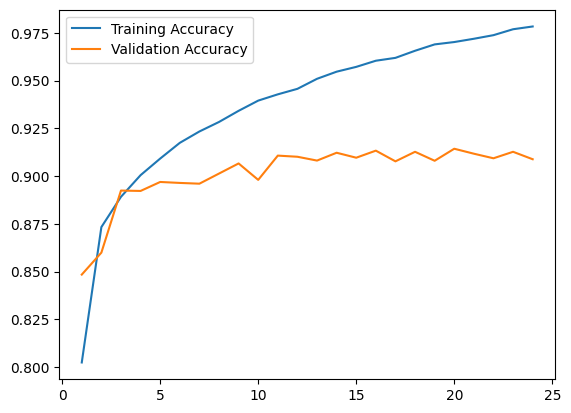

In [46]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [47]:
#model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

Parameters in a Conv layer:

((shape of width of filter *X* shape of height filter *X* number of filters in the previous layer+1) *X* number of filters)

Parameters in the FC layer🇰

((current layer c *X* previous layer p)+1 *X* c)

In **keras**, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

If you don't want to train: trainable=False

Understand the logic behind parameters:

https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

In [49]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("cnn_mnist_model_weights.weights.h5")